# Building dataframe


Import needed library for learning model

In [226]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


Build dataframe for training set

In [227]:
dataframe = pd.read_csv('C:\\Users\\LamPhuss\\Code\\Python\\ML_Projects-main\\cleaned_data.csv')
dataframe.head()

,car_price,car_title,car_sub_title,car_attention_grabber,car_seller,car_seller_rating,car_seller_location,year,reg,engine_size,...,miles_traveled,power,service,warranty,first_year_tax,accident_type,new_brand,approve_used,finance,title
0,89995,AC Cobra,4.9 MK IV CRS 2dr,GENUINE AC COBRA CRS 522 BHP,Private seller,NaN,watford,2001.0,X,4.9,...,14400.0,167.7825,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 4.9 MK IV CRS 2dr
1,92500,AC Cobra,378 - MkIV,PHYSICAL CAR!,Boss Motor Company Limited,5.0,chesham,2019.0,T,NaN,...,650.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 378 - MkIV
2,109995,AC Cobra,MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWIN TURBO. ...,FULL CARBON FIBRE BODY.,PREMIER GT LIMITED,4.8,pulborough,2000.0,X,3.5,...,21600.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra MK1V 212 SC. 3.5 V8 350 BHP LOTUS TWI...
3,124950,AC Cobra,302 MKIV 2dr,ABSOLUTELY STUNNING,TOP 555 LIMITED,5.0,oakham,1989.0,F,NaN,...,2750.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 302 MKIV 2dr
4,124950,AC Cobra,302 MKIV With Factory Lightweight Engine 5.0 2dr,'STAGE 3' SVO ENGINE,TOP 555 LIMITED,5.0,oakham,1989.0,E,5.0,...,15142.0,NaN,UnKnown,0,0,UnKnown,0,0,0,AC Cobra 302 MKIV With Factory Lightweight Eng...


# Data Analysis and Preprocessing

## Check collumns and shapes in dataframe

In [190]:
dataframe.columns

Index(['car_price', 'car_title', 'car_sub_title', 'car_attention_grabber',
       'car_seller', 'car_seller_rating', 'car_seller_location', 'year', 'reg',
       'engine_size', 'transmission', 'ulez', 'full_dealership', 'discounted',
       'fuel_type', 'car_type', 'num_owners', 'miles_traveled', 'power',
       'service', 'warranty', 'first_year_tax', 'accident_type', 'new_brand',
       'approve_used', 'finance', 'title'],
      dtype='object')

In [191]:
print("There are " + str(dataframe.shape[0]) + " rows and " + str(dataframe.shape[1]) + " columns")

There are 818456 rows and 27 columns


## Describe some basic statistical values

In [147]:
dataframe.describe()

,car_price,car_seller_rating,year,engine_size,ulez,full_dealership,discounted,num_owners,miles_traveled,power,warranty,first_year_tax,new_brand,approve_used,finance
count,8.184560e+05,644191.000000,747436.000000,803010.000000,818456.000000,818456.000000,818456.000000,442596.000000,763847.000000,814375.000000,818456.000000,818456.000000,818456.000000,818456.000000,818456.000000
mean,2.011859e+04,4.649465,2015.974279,1.860284,0.815449,0.035079,6.957739,2.097290,48726.666861,125.379807,0.063693,0.063693,0.066233,0.146940,0.716983
std,2.224110e+04,0.433626,4.346820,0.752763,0.387933,0.183981,66.422946,1.265622,36522.828455,67.822551,0.244206,0.244206,0.248690,0.354046,0.450465
min,3.000000e+02,1.000000,1934.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.745700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.990000e+03,4.600000,2014.000000,1.400000,1.000000,0.000000,0.000000,1.000000,19431.000000,84.582500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.500000e+04,4.700000,2017.000000,1.600000,1.000000,0.000000,0.000000,2.000000,40254.000000,110.325000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.450000e+04,4.900000,2019.000000,2.000000,1.000000,0.000000,0.000000,3.000000,71200.000000,139.745000,0.000000,0.000000,0.000000,0.000000,1.000000
max,3.199830e+06,5.000000,2022.000000,8.300000,1.000000,1.000000,998.000000,32.000000,999999.000000,1834.422000,1.000000,1.000000,1.000000,1.000000,1.000000


## Describe summary of data frame 

In [148]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818456 entries, 0 to 818455
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   car_price              818456 non-null  int64  
 1   car_title              818456 non-null  object 
 2   car_sub_title          817909 non-null  object 
 3   car_attention_grabber  738163 non-null  object 
 4   car_seller             818348 non-null  object 
 5   car_seller_rating      644191 non-null  float64
 6   car_seller_location    816256 non-null  object 
 7   year                   747436 non-null  float64
 8   reg                    747436 non-null  object 
 9   engine_size            803010 non-null  float64
 10  transmission           818243 non-null  object 
 11  ulez                   818456 non-null  int64  
 12  full_dealership        818456 non-null  int64  
 13  discounted             818456 non-null  float64
 14  fuel_type              818234 non-nu

## Handle missing value (first way)

Get all columns that have missing values

In [228]:
dataframe.columns[dataframe.isna().any()].tolist()

['car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'year',
 'reg',
 'engine_size',
 'transmission',
 'fuel_type',
 'car_type',
 'num_owners',
 'miles_traveled',
 'power',
 'title']

In [229]:
train_missings = dataframe.filter(
['car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'year',
 'reg',
 'engine_size',
 'transmission',
 'fuel_type',
 'car_type',
 'num_owners',
 'miles_traveled',
 'power',
 'title'],axis=1)

In [230]:
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)

Missing-value rate of train data:
car_sub_title             0.066833
car_attention_grabber     9.810301
car_seller                0.013196
car_seller_rating        21.291920
car_seller_location       0.268799
year                      8.677314
reg                       8.677314
engine_size               1.887212
transmission              0.026025
fuel_type                 0.027124
car_type                  0.086993
num_owners               45.923055
miles_traveled            6.672197
power                     0.498622
title                     0.066833
dtype: float64


Fill missing category values with UnKnown

In [231]:
dataframe['car_seller'] = dataframe['car_seller'].fillna('UnKnown')
dataframe['car_seller_location'] = dataframe['car_seller_location'].fillna('UnKnown')
dataframe['fuel_type'] = dataframe['fuel_type'].fillna('UnKnown')
dataframe['car_sub_title'] = dataframe['car_sub_title'].fillna('UnKnown')
dataframe['transmission'] = dataframe['transmission'].fillna('UnKnown')
dataframe['car_type'] = dataframe['car_type'].fillna('UnKnown')
dataframe['car_attention_grabber'] = dataframe['car_attention_grabber'].fillna('UnKnown')
dataframe['reg'] = dataframe['reg'].fillna('UnKnown')
#dataframe['title'] = dataframe['title'].fillna('UnKnown')

We will fill missing data with their mode 

In [232]:
#dataframef= dataframe.assign(title = dataframe['car_title'] + " " + dataframe['car_sub_title'] if not dataframe['car_sub_title'].empty else dataframe['car_title'])
#dataframe.drop(['car_sub_title'], axis=1, inplace=True)

dataframe['year'] = dataframe.groupby('car_title')['year'].transform(lambda x: x.fillna(int(x.mode()[0])) if not x.mode().empty else None)
dataframe['reg'] = dataframe.groupby('car_title')['reg'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['car_attention_grabber'] = dataframe.groupby('car_title')['car_attention_grabber'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['engine_size'] = dataframe.groupby('car_title')['engine_size'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['car_seller_rating'] = dataframe.groupby('title')['car_seller_rating'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['power'] = dataframe.groupby('car_title')['engine_size'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
dataframe['miles_traveled'] = dataframe.groupby('car_title')['engine_size'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else None)
#dataframe.dropna(subset=['miles_traveled', 'car_seller_rating', 'engine_size', 'power', 'car_seller_location',
                #  'year', 'reg', 'car_type', 'car_attention_grabber', 'fuel_type', 'transmission', 'car_seller'],
                #inplace=True)

We will recheck NaN values again

In [233]:
train_missings = dataframe.filter(
['car_sub_title',
 'car_attention_grabber',
 'car_seller',
 'car_seller_rating',
 'car_seller_location',
 'year',
 'reg',
 'engine_size',
 'transmission',
 'fuel_type',
 'car_type',
 'num_owners',
 'miles_traveled',
 'power',
 'title'],axis=1)
print("Missing-value rate of train data:")
mis_val_train = train_missings.isnull().sum() / len(train_missings) * 100
print(mis_val_train)

Missing-value rate of train data:
car_sub_title             0.000000
car_attention_grabber     0.000000
car_seller                0.000000
car_seller_rating         5.417518
car_seller_location       0.000000
year                      0.206731
reg                       0.000000
engine_size               1.367819
transmission              0.000000
fuel_type                 0.000000
car_type                  0.000000
num_owners               45.923055
miles_traveled            1.367819
power                     1.367819
title                     0.066833
dtype: float64


Because there are some columns that cannot be filled with data because there is no data in the columns with the same attribute related to them, we will remove them.

In [234]:
dataframe.dropna(subset=['car_seller_rating', 'year', 'engine_size', 'power', 'miles_traveled'],
                inplace=True)

We will drop title and num_owners since car_title and car_sub_title contain all needed infomations of title  and num_owners miss too much values

In [235]:
dataframe.drop(['title', 'num_owners'], axis=1, inplace=True)

Checking missing data again

In [236]:
print("Number of columns that have NaN values are : " + str(len(dataframe.columns[dataframe.isna().any()].tolist())))

Number of columns that have NaN values are : 0


All NaN values have been handled ,so we have done this step

In [237]:
dataframe.shape

(762247, 25)

## Handling outliers

We need to find all the columns that could contain outliers

In [238]:
dataframe.select_dtypes(include=['int', 'float']).columns.tolist()


['car_price',
 'car_seller_rating',
 'year',
 'engine_size',
 'ulez',
 'full_dealership',
 'discounted',
 'miles_traveled',
 'power',
 'warranty',
 'first_year_tax',
 'new_brand',
 'approve_used',
 'finance']

In [239]:
train_outliers = dataframe.filter( [
 'car_seller_rating',
 'year',
 'ulez',
 'full_dealership',
 'discounted',
 'miles_traveled',
 'power',
 'warranty',
 'first_year_tax',
 'new_brand',
 'approve_used',
 'finance'],axis=1)

We will remove all rows that contain outliers

In [240]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))
    

NUmber of outliers in car_seller_rating is : 60005
NUmber of outliers in year is : 19255
NUmber of outliers in ulez is : 124451
NUmber of outliers in full_dealership is : 27840
NUmber of outliers in discounted is : 33996
NUmber of outliers in miles_traveled is : 88983
NUmber of outliers in power is : 88983
NUmber of outliers in warranty is : 46882
NUmber of outliers in first_year_tax is : 46882
NUmber of outliers in new_brand is : 48741
NUmber of outliers in approve_used is : 113398
NUmber of outliers in finance is : 0


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart

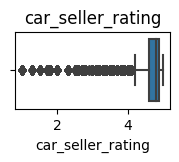

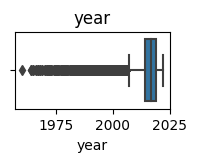

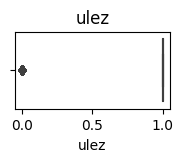

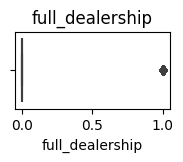

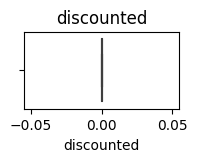

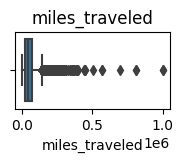

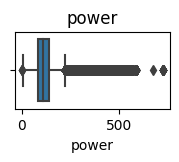

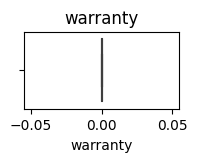

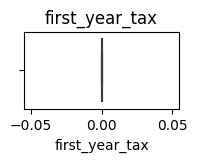

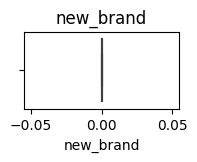

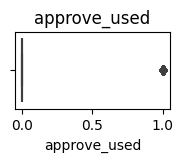

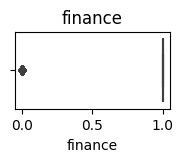

In [121]:

for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

Replace all outliers

In [241]:
for col in train_outliers:
    q1 = train_outliers[col].quantile(0.25)
    q3 = train_outliers[col].quantile(0.75)
    iqr = q3 - q1
    range_low = q1 - 1.5 * iqr
    range_high = q3 + 1.5 * iqr
    dataframe = dataframe[(dataframe[col] >= range_low) & (dataframe[col] <= range_high)]
    outliers = dataframe[(dataframe[col] < range_low) | (dataframe[col] > range_high)]
    print("NUmber of outliers in " + str(col) + " is : " + str(len(outliers)))

NUmber of outliers in car_seller_rating is : 0
NUmber of outliers in year is : 0
NUmber of outliers in ulez is : 0
NUmber of outliers in full_dealership is : 0
NUmber of outliers in discounted is : 0
NUmber of outliers in miles_traveled is : 0
NUmber of outliers in power is : 0
NUmber of outliers in warranty is : 0
NUmber of outliers in first_year_tax is : 0
NUmber of outliers in new_brand is : 0
NUmber of outliers in approve_used is : 0
NUmber of outliers in finance is : 0


Display the distribution of values in each column of a dataset and highlight outliers by boxplot chart after replaced all outliers

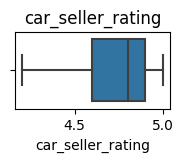

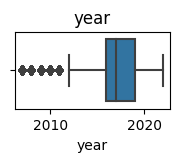

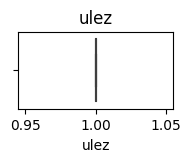

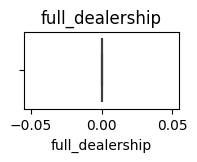

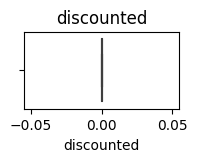

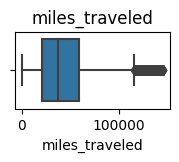

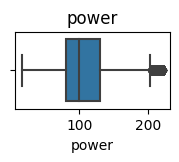

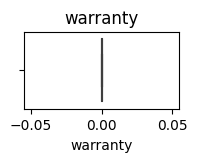

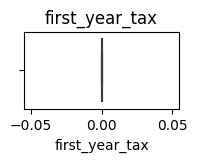

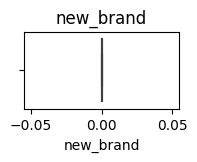

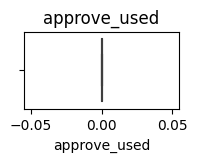

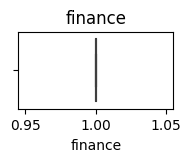

In [123]:
for col in train_outliers:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=dataframe[col], whis=1.5)
    plt.title(col)
    plt.show()

Checking the data after removing outliers

In [206]:
dataframe.shape

(384175, 25)

## Encoding labels

Get all columns that contain object-type values

In [242]:
encoding_col = dataframe.select_dtypes(include='object')
encoding_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384175 entries, 11 to 818418
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   car_title              384175 non-null  object
 1   car_sub_title          384175 non-null  object
 2   car_attention_grabber  384175 non-null  object
 3   car_seller             384175 non-null  object
 4   car_seller_location    384175 non-null  object
 5   reg                    384175 non-null  object
 6   transmission           384175 non-null  object
 7   fuel_type              384175 non-null  object
 8   car_type               384175 non-null  object
 9   service                384175 non-null  object
 10  accident_type          384175 non-null  object
dtypes: object(11)
memory usage: 35.2+ MB


Encoding all object-type then recheck

In [243]:
le = LabelEncoder()
for col in encoding_col:
    le.fit(encoding_col[col].astype(str))
    dataframe[col] = le.transform(encoding_col[col].astype(str))



In [244]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384175 entries, 11 to 818418
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   car_price              384175 non-null  int64  
 1   car_title              384175 non-null  int32  
 2   car_sub_title          384175 non-null  int32  
 3   car_attention_grabber  384175 non-null  int32  
 4   car_seller             384175 non-null  int32  
 5   car_seller_rating      384175 non-null  float64
 6   car_seller_location    384175 non-null  int32  
 7   year                   384175 non-null  float64
 8   reg                    384175 non-null  int32  
 9   engine_size            384175 non-null  float64
 10  transmission           384175 non-null  int32  
 11  ulez                   384175 non-null  int64  
 12  full_dealership        384175 non-null  int64  
 13  discounted             384175 non-null  float64
 14  fuel_type              384175 non-null  

## Choose appopriate columns

Fetching heatmap figure

Text(0.5, 1.0, 'Correlation between the columns')

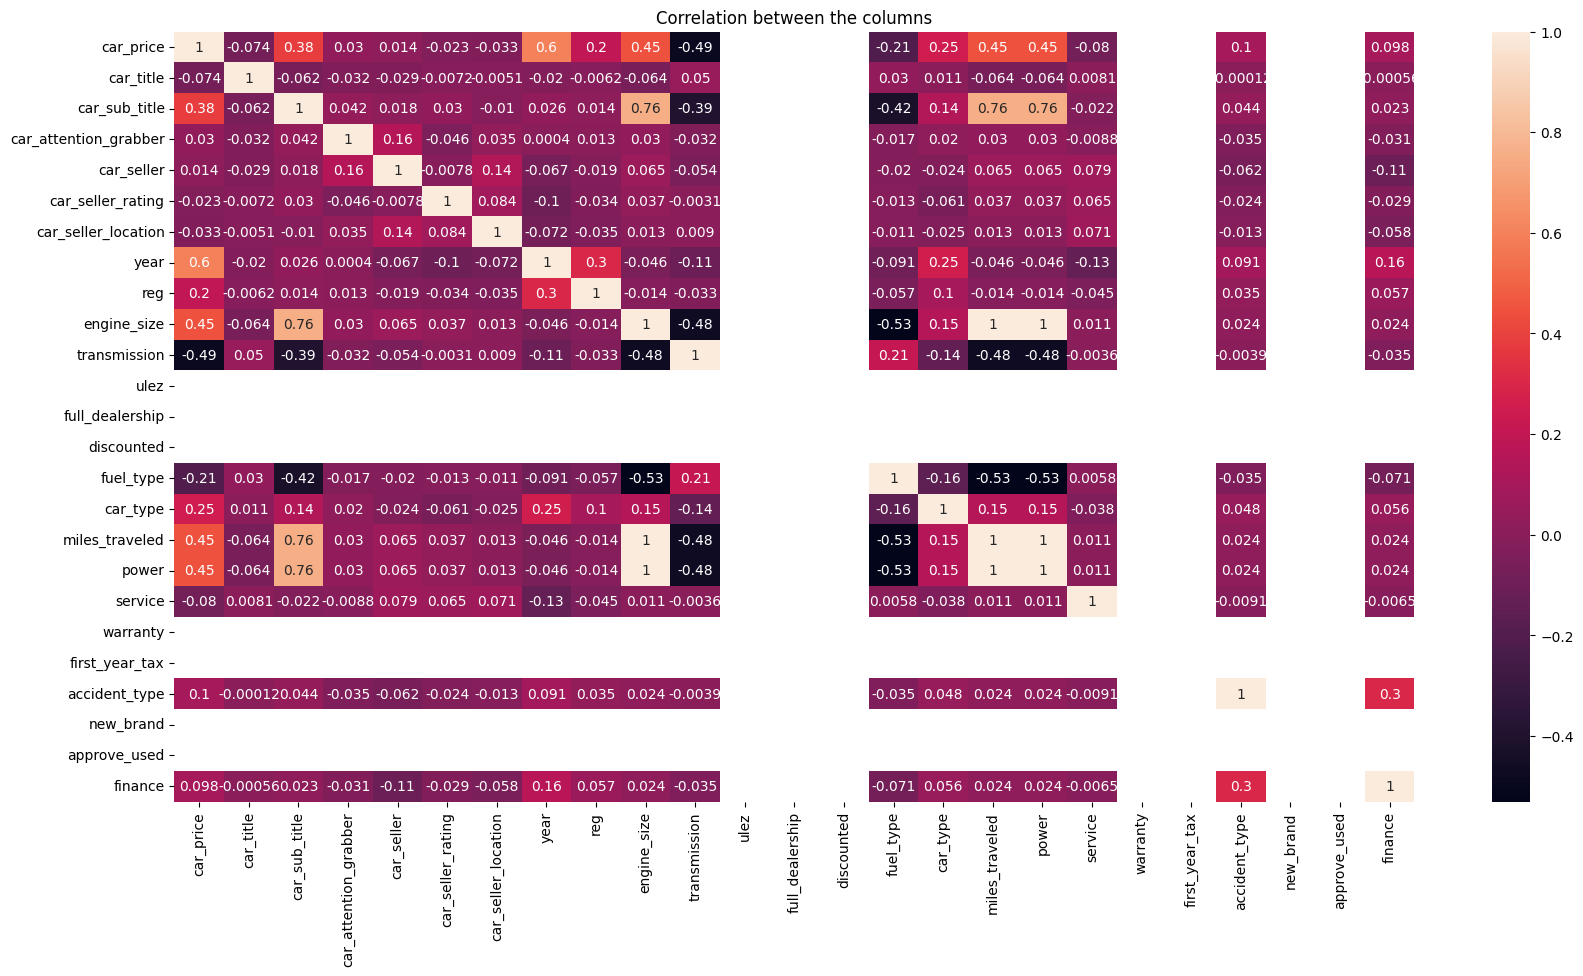

In [245]:
plt.figure(figsize=(20,10))
sns.heatmap(dataframe.corr(),annot=True)
plt.title("Correlation between the columns")

In [246]:
corr_matrix = dataframe.corr()['car_price']

Get top 10 features that will be used for the regressions models

In [247]:
top_10_cols = corr_matrix.abs().nlargest(16).iloc[1:].index

In [248]:
y = dataframe['car_price'].values

In [249]:
dataframe = dataframe.drop(columns=dataframe.columns.difference(top_10_cols))
dataframe['car_price'] = y

In [250]:
dataframe.columns

Index(['car_title', 'car_sub_title', 'car_attention_grabber',
       'car_seller_location', 'year', 'reg', 'engine_size', 'transmission',
       'fuel_type', 'car_type', 'miles_traveled', 'power', 'service',
       'accident_type', 'finance', 'car_price'],
      dtype='object')

## Splitting data into train and test

In [251]:
y = dataframe['car_price']
X = dataframe.drop(columns=['car_price'],axis=1)

y.head()

11    15649
12    15995
13    16195
14    16199
15    16800
Name: car_price, dtype: int64

In [252]:
# 60% train ,20% validation ,20% test 
X_train_or, X_test, y_train_or, y_test = train_test_split(X, y, test_size=0.4 , random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train_or, y_train_or, test_size=0.4, random_state = 42)
print(X_train.shape)
print(y_val.shape)


(138303, 15)
(92202,)


In [253]:
X_train.head()

,car_title,car_sub_title,car_attention_grabber,car_seller_location,year,reg,engine_size,transmission,fuel_type,car_type,miles_traveled,power,service,accident_type,finance
538074,1078,275,89951,1319,2018.0,11,0.9,1,2,6,0.9,0.9,0,4,1
140569,275,11290,9184,1289,2019.0,12,1.2,1,2,6,1.2,1.2,3,4,1
317707,709,33108,87416,1698,2019.0,12,1.6,1,2,10,1.6,1.6,3,4,0
680317,1391,39856,38636,210,2010.0,19,1.8,0,2,6,1.8,1.8,0,4,1
548833,1098,15927,33711,20,2020.0,13,1.3,1,2,10,1.3,1.3,0,4,1


# Training the model

Bulding function needed to get metrics for val set

In [254]:
def get_metrics(model):
    print(f'Train score {model.score(X_train, y_train)}')
    print(f'Val score {r2_score(y_test,model.predict(X_test) )}')
    print("MAE:" , metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE:" , metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))
    



## Basic Linear Regression

In [255]:
lr = LinearRegression()
lr.fit(X_train, y_train)
score = lr.score(X_val, y_val)
get_metrics(lr)

Train score 0.6451796947379362
Val score 0.6452665842367873
MAE: 3594.4633826228824
MSE: 31224187.21346982
RMSE: 5587.860700972226


## Lasso

In [256]:
ls = Lasso()
ls.fit(X_train, y_train)
get_metrics(ls)

Train score 0.6451790731663016
Val score 0.6452666200820294
MAE: 3593.757557867542
MSE: 31224184.058315836
RMSE: 5587.860418650043


## Ridge

In [257]:
rd = Ridge()
rd.fit(X_train, y_train)
get_metrics(rd)

Train score 0.645179694555242
Val score 0.6452665981295045
MAE: 3594.4475648544703
MSE: 31224185.990611237
RMSE: 5587.860591551228


## Random forest

In [262]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=8,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train,y_train)
get_metrics(rf)


Train score 0.8120074573703373
Val score 0.8038968298777973
MAE: 2632.2732872460815
MSE: 17261306.16670699
RMSE: 4154.672811029406


## Keras model

In [263]:
from tensorflow import keras

Define the neural network model architecture

In [264]:

kr = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=[10]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

Compile the model with appropriate loss function and optimizer

In [265]:
# Compile the model with appropriate loss function and optimizer
kr.compile(loss='mean_squared_error', optimizer='adam')

Define a callback to show the progress (number of epoch)

In [266]:

class ProgressCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            print("Epoch {}: loss = {:.4f}".format(epoch, logs['loss']))

Train the model on the training data

In [ ]:

kr.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0, callbacks=[ProgressCallback()])

Use the trained model to make predictions on the testing data

In [ ]:

predictions = kr.predict(X_val)

In [ ]:
print(f'Train score {r2_score(y_train,kr.predict(X_train) )}')
print(f'Val score {r2_score(y_val, predictions)}')
print("MAE:" , metrics.mean_absolute_error(y_val,kr.predict(X_val)))
print("MSE:" , metrics.mean_squared_error(y_val,kr.predict(X_val)))
print("RMSE:" , np.sqrt(metrics.mean_squared_error(y_val,kr.predict(X_val))))